In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv('data/ex1data1.txt', sep=',',header=None)
data.columns = ['x','y']
data['ones'] = 1
print(data.head())

        x        y  ones
0  6.1101  17.5920     1
1  5.5277   9.1302     1
2  8.5186  13.6620     1
3  7.0032  11.8540     1
4  5.8598   6.8233     1


Text(0,0.5,'Profit in 10,000 $')

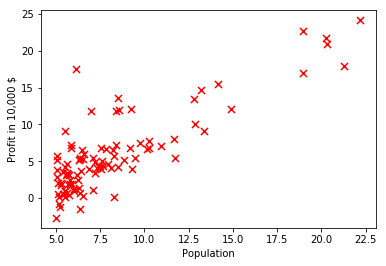

In [91]:
plt.scatter(data['x'],data['y'],c='r',marker='x',s=50)
plt.xlabel('Population')
plt.ylabel('Profit in 10,000 $')

In [92]:
def cost_function(x,theta,y):
    predicted_cost = np.dot(x,theta)
    cost = (1/(2*y.shape[0]))*np.sum(np.square(predicted_cost - y))
    return cost
    

In [171]:
def gradient_descent(x,y,theta,alpha,num_iterations):
    i=0
    J_history = np.zeros(num_iterations)
    while i < num_iterations:
        predicted_cost = np.dot(x,theta)
        diffrence = predicted_cost - y
        theta = theta - (alpha/(y.shape[0]) * np.dot(x.T,diffrence))
        J_history[i] = compute_cost(x,theta,y)
        i=i+1;
    return theta,J_history

In [185]:
x = data[['ones','x']]
y = data['y'].values.reshape((-1,1))
num_iterations = 1500
alpha = 0.01
theta = np.zeros((2,1))
print("Cost before applying gradient descent: "+str(compute_cost(x,theta,y)))
theta,J_history = gradient_descent(x,y,theta,alpha,num_iterations)
print("Cost before applying gradient descent: "+str(compute_cost(x,theta,y)))
print("Theta: "+str(theta))

Cost before applying gradient descent: 32.0727338775
Cost before applying gradient descent: 4.48338825659
Theta: [[-3.63029144]
 [ 1.16636235]]


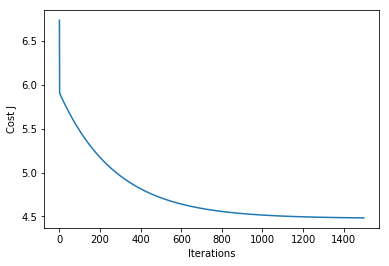

In [186]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.show()

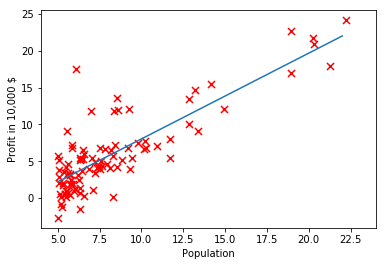

In [193]:
xx = np.arange(5,23)
yy = np.dot(np.c_[np.ones(xx.shape[0]),xx],theta)
plt.scatter(data['x'],data['y'],c='r',marker='x',s=50)
plt.xlabel('Population')
plt.ylabel('Profit in 10,000 $')
plt.xlim(4,24)
plt.plot(xx,yy)